In [1]:
import pandas as pd
import numpy as np
import pandas_datareader as data
import matplotlib.pyplot as plt
from datetime import date
from dateutil.relativedelta import relativedelta

start =  (date.today() - relativedelta(years = 1)).strftime("%Y-%m-%d")
end = date.today().strftime("%Y-%m-%d")
stock_ticker = input("Enter Stock ticker:")
df = data.DataReader(stock_ticker, 'yahoo', start, end)
df.head()

Enter Stock ticker:AAPL


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-03-10,122.169998,119.449997,121.690002,119.980003,111943300.0,119.271111
2021-03-11,123.209999,121.260002,122.540001,121.959999,103026500.0,121.239410
2021-03-12,121.169998,119.160004,120.400002,121.029999,88105100.0,120.314903
2021-03-15,124.000000,120.419998,121.410004,123.989998,92403800.0,123.257416
2021-03-16,127.220001,124.720001,125.699997,125.570000,115227900.0,124.828079


In [2]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-03-07,165.020004,159.039993,163.360001,159.300003,96418800.0,159.300003
2022-03-08,162.880005,155.800003,158.820007,157.440002,131148300.0,157.440002
2022-03-09,163.410004,159.410004,161.479996,162.949997,91454900.0,162.949997
2022-03-10,160.389999,155.979996,160.199997,158.520004,105180300.0,158.520004
2022-03-10,160.389999,155.979996,160.199997,158.520004,96831210.0,158.520004


In [3]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2021-03-10,122.169998,119.449997,121.690002,119.980003,111943300.0,119.271111
1,2021-03-11,123.209999,121.260002,122.540001,121.959999,103026500.0,121.239410
2,2021-03-12,121.169998,119.160004,120.400002,121.029999,88105100.0,120.314903
3,2021-03-15,124.000000,120.419998,121.410004,123.989998,92403800.0,123.257416
4,2021-03-16,127.220001,124.720001,125.699997,125.570000,115227900.0,124.828079


In [4]:
df.shape

(255, 7)

In [5]:
prediction_input = df[-100:]
prediction_input

,Date,High,Low,Open,Close,Volume,Adj Close
155,2021-10-19,149.169998,146.550003,147.009995,148.759995,76378900.0,148.354187
156,2021-10-20,149.750000,148.119995,148.699997,149.259995,58418800.0,148.852829
157,2021-10-21,149.639999,147.869995,148.809998,149.479996,61421000.0,149.072235
158,2021-10-22,150.179993,148.639999,149.690002,148.690002,58883400.0,148.284393
159,2021-10-25,149.369995,147.619995,148.679993,148.639999,50720600.0,148.234528
...,...,...,...,...,...,...,...
250,2022-03-07,165.020004,159.039993,163.360001,159.300003,96418800.0,159.300003
251,2022-03-08,162.880005,155.800003,158.820007,157.440002,131148300.0,157.440002
252,2022-03-09,163.410004,159.410004,161.479996,162.949997,91454900.0,162.949997
253,2022-03-10,160.389999,155.979996,160.199997,158.520004,105180300.0,158.520004


In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [7]:
fun_inp = pd.DataFrame(prediction_input['Close'])
fun_inp

,Close
155,148.759995
156,149.259995
157,149.479996
158,148.690002
159,148.639999
...,...
250,159.300003
251,157.440002
252,162.949997
253,158.520004


In [8]:
fun_inp.shape

(100, 1)

In [9]:
fun_inp = scaler.fit_transform(fun_inp)
inp = fun_inp

In [10]:
fun_inp = fun_inp.reshape(1,100)

In [11]:
fun_inp.shape

(1, 100)

In [12]:
tmp_inp = list(fun_inp)
tmp_inp = tmp_inp[0].tolist()
tmp_inp

[0.026069109711768235,
 0.040714687009335115,
 0.047158776776068834,
 0.02401896130283454,
 0.02255431418356757,
 0.04247253172098553,
 0.028705653305467926,
 0.13766878415517336,
 0.056532160781335605,
 0.03192769818883434,
 0.06297625054806932,
 0.10603428355872158,
 0.09051000737910453,
 0.09988294443682122,
 0.07527848184431996,
 0.0861160660213045,
 0.0014646471192669708,
 0.0,
 0.06209755166601916,
 0.06239030231085341,
 0.09168145690598806,
 0.16461659274899088,
 0.2929115459513483,
 0.37141207267903464,
 0.38517895109455225,
 0.3966024835087527,
 0.41212675968837065,
 0.2618629935921133,
 0.3623318862661513,
 0.5105450570059249,
 0.49502078082630785,
 0.46543642863878976,
 0.4091974654498376,
 0.5111310052431417,
 0.6827767421009847,
 0.7970125131905395,
 0.7817809876557558,
 0.9250147157480626,
 0.8163447824907406,
 0.7750441472441887,
 0.9206212213378127,
 0.7144112426974356,
 0.6816052925741003,
 0.6408906055647652,
 0.7357941073541197,
 0.8134154882522076,
 0.83216180931519

In [13]:
# predicting next n days
import tensorflow as tf
from tensorflow.keras.models import load_model
model = load_model('%s_final_model.h5'%(stock_ticker))

In [14]:
lst_out = []
n_steps = 100
n = int(input("Enter number of days of prediction: "))
i = 0

while(i<n):
    
    if(len(tmp_inp)>100):
        fun_inp = np.array(tmp_inp[1:])
        fun_inp = fun_inp.reshape(1,-1)
        fun_inp = fun_inp.reshape((1, n_steps, 1))
        yhat = model.predict(fun_inp, verbose = 0)
        tmp_inp.extend(yhat[0].tolist())
        tmp_inp = tmp_inp[1:]
        lst_out.extend(yhat.tolist())
        i = i+1
    else:
        fun_inp = fun_inp.reshape((1, n_steps, 1))
        yhat = model.predict(fun_inp, verbose = 0)
        tmp_inp.extend(yhat[0].tolist())
        lst_out.extend(yhat.tolist())
        i = i+1
        
print(lst_out)

Enter number of days of prediction: 30
[[0.34243687987327576], [0.33474770188331604], [0.3344717025756836], [0.33801764249801636], [0.343429297208786], [0.34975552558898926], [0.35653477907180786], [0.36351850628852844], [0.3705538213253021], [0.3775436282157898], [0.38443419337272644], [0.39120855927467346], [0.39787763357162476], [0.40447211265563965], [0.411031574010849], [0.41759708523750305], [0.4242047369480133], [0.43088167905807495], [0.43764469027519226], [0.44450005888938904], [0.45144474506378174], [0.458469033241272], [0.46555882692337036], [0.47269806265830994], [0.4798712730407715], [0.4870654046535492], [0.49427059292793274], [0.501481831073761], [0.5086979866027832], [0.5159223675727844]]


In [15]:
plot_new = np.arange(1, 101)
plot_pred = np.arange(101, 101 + n)

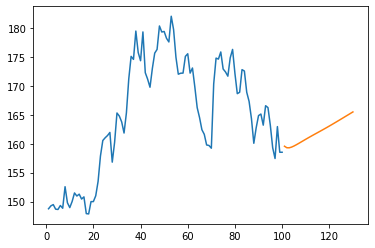

In [16]:
plt.plot(plot_new, scaler.inverse_transform(inp))
plt.plot(plot_pred, scaler.inverse_transform(lst_out))

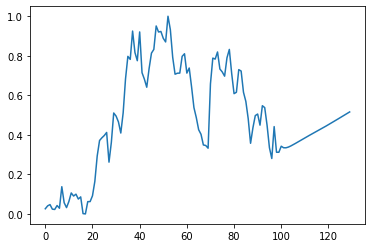

In [17]:
inp = inp.tolist()
inp.extend(lst_out)
plt.plot(inp)

In [18]:
final = scaler.inverse_transform(inp).tolist()

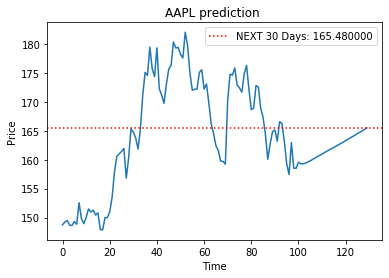

In [19]:
# plotting final result
plt.plot(final)
plt.ylabel("Price")
plt.xlabel("Time")
plt.title("%s prediction "%(stock_ticker))
plt.axhline(y=final[len(final)-1], color = 'red', linestyle = ':', label = 'NEXT %d Days: %f'%(n, (round(float(*final[len(final)-1]),2))))
plt.legend()                                                                                                                